In [13]:
#
# Attempt at Monte Carlo using random numbers
#
import random
import math
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Initialize the number of random variables
nran = 10000

# Set random seed for reproducibility
np.random.seed(121)

# Generate normally distributed random variables
r_draw = np.random.normal(loc=0, scale=1, size=nran)
print('Sample of generated random variables:', r_draw[:5])  # Display the first 5 generated values

Sample of generated random variables: [-0.21203317 -0.28492917 -0.57389821 -0.44031017 -0.33011056]


In [7]:
# Black-Scholes inputs
S0 = 100    
K = 100     
T = 1      
Sigma = 0.2 
r = 0.05    
#
# One step calculation (using a single time step for simplicity)
Nstep = 1
DeltaT = T / Nstep
#
# Create arrays to hold stock prices, payoff values, and present values
stockp = np.zeros(nran, dtype='float')
payoff_call = np.zeros(nran, dtype='float')
payoff_put = np.zeros(nran, dtype='float')
pvpayoff_call = np.zeros(nran, dtype='float')
pvpayoff_put = np.zeros(nran, dtype='float')
#
# Simulate end-of-period stock prices and calculate payoff for both call and put options
for x in range(nran):
    # Calculate the end-of-period stock price using the Black-Scholes formula
    stockp[x] = S0 * math.exp((r * DeltaT - 0.5 * Sigma**2 * DeltaT) + (Sigma * DeltaT**0.5) * r_draw[x])
    
    # Calculate the payoff for the call option
    if stockp[x] > K:
        payoff_call[x] = stockp[x] - K
    else:
        payoff_call[x] = 0.0
    
    # Calculate the payoff for the put option
    if stockp[x] < K:
        payoff_put[x] = K - stockp[x]
    else:
        payoff_put[x] = 0.0
# Take Present Value for both call and put payoffs
    pvpayoff_call[x] = math.exp(-r * T) * payoff_call[x]
    pvpayoff_put[x] = math.exp(-r * T) * payoff_put[x]
#
# Calculate the estimated value of the call and put options using Monte Carlo
BSCall_MC = np.mean(pvpayoff_call)
BSPut_MC = np.mean(pvpayoff_put)
print(f"Estimated Call Option Value (Monte Carlo): {BSCall_MC:.4f}")
print(f"Estimated Put Option Value (Monte Carlo): {BSPut_MC:.4f}")

Estimated Call Option Value (Monte Carlo): 10.3665
Estimated Put Option Value (Monte Carlo): 5.6278


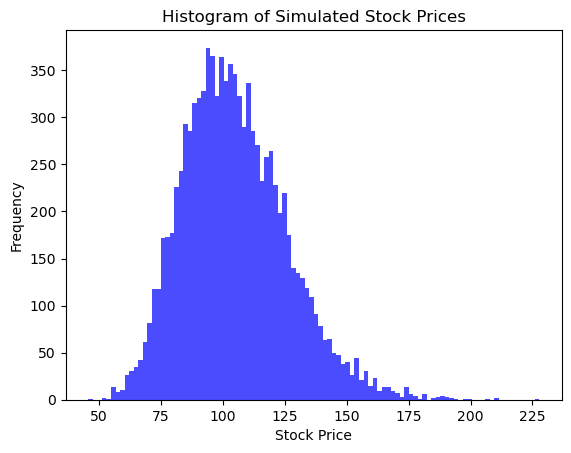

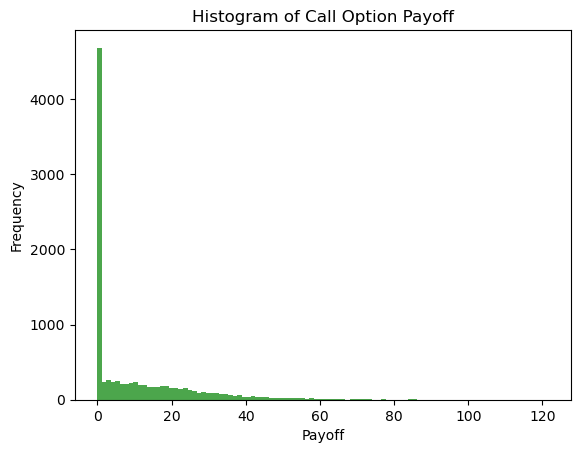

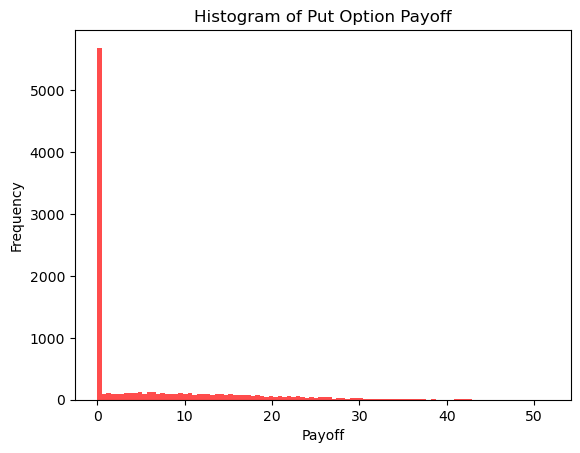

In [11]:
# Plot the histogram for the simulated end-of-period stock prices
plt.hist(stockp, bins=100, color='blue', alpha=0.7)  # arguments are passed to np.histogram
plt.title("Histogram of Simulated Stock Prices")
plt.xlabel("Stock Price")
plt.ylabel("Frequency")
plt.show()
#
# Plot the histogram for the call option payoffs
plt.hist(pvpayoff_call, bins=100, color='green', alpha=0.7)  # arguments are passed to np.histogram
plt.title("Histogram of Call Option Payoff")
plt.xlabel("Payoff")
plt.ylabel("Frequency")
plt.show()
#
# Plot the histogram for the put option payoffs
plt.hist(pvpayoff_put, bins=100, color='red', alpha=0.7)  # arguments are passed to np.histogram
plt.title("Histogram of Put Option Payoff")
plt.xlabel("Payoff")
plt.ylabel("Frequency")
plt.show()